<a href="https://colab.research.google.com/github/manish2393cool/ML-Python/blob/master/9_Gradient_Descent_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Obtain the 10 target (output) datapoints for the following equation for uniformly spaced input variable in the range [0,10]. 
### y = x+3 + noise
### where, noise can be Gaussian noise added to the actual signal.

In [0]:
import random
import numpy as np
import matplotlib.pyplot as plt
N=20

In [2]:
X = np.array([i for i in range(1,N+1)])
noise = np.random.normal(0,1,N)
y = X + 5
y_ = X + 5 + noise
X,y,y_,noise

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20]),
 array([ 6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
        23, 24, 25]),
 array([ 8.06917421,  7.30953908,  5.73321537,  9.85824299, 10.59764571,
        11.18219296, 12.67808494, 13.07950194, 13.5205609 , 13.46005083,
        15.75700354, 18.04626702, 17.32735284, 19.23461784, 20.25901298,
        20.96423328, 20.73030893, 24.5610692 , 24.43212797, 24.71822066]),
 array([ 2.06917421,  0.30953908, -2.26678463,  0.85824299,  0.59764571,
         0.18219296,  0.67808494,  0.07950194, -0.4794391 , -1.53994917,
        -0.24299646,  1.04626702, -0.67264716,  0.23461784,  0.25901298,
        -0.03576672, -1.26969107,  1.5610692 ,  0.43212797, -0.28177934]))

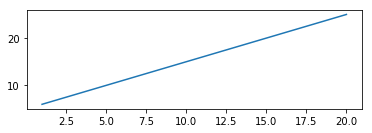

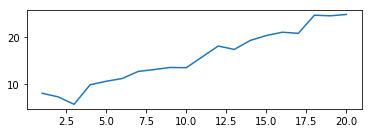

In [3]:
plt.figure(1)
plt.subplot(211)
plt.plot(X, y)
plt.show()
plt.figure(2)
plt.subplot(212)
plt.plot(X, y_)
plt.show()

### Using Gradient Descent

In [0]:
def SGD(theta, alpha, num_iters, h, X, y):
    for i in range(0,num_iters):
        theta[0] = theta[0] - (alpha) * (h - y)
        theta[1] = theta[1] - (alpha) * ((h - y) * X)
        h = theta[1]*X + theta[0] 
    return theta

def hypothesis(theta, X):
    h = np.ones((X.shape[0],1))
    for i in range(0,X.shape[0]):
        x = np.concatenate((np.ones(1), np.array([X[i]])), axis = 0)
        h[i] = float(np.matmul(theta, x))
    h = h.reshape(X.shape[0])
    return h

def sgd_linear_regression(X, y, alpha, num_iters):
    # initializing the parameter vector
    theta = np.zeros(2)
    # hypothesis calculation
    h = hypothesis(theta, X)
    print('X: ',X)
    print('h: ',h)
    # returning the optimized parameters by Gradient Descent
    for i in range(0, X.shape[0]):
        theta = SGD(theta,alpha,num_iters,h[i],X[i],y[i])
    theta = theta.reshape(1, 2)
    return theta

In [5]:
theta = sgd_linear_regression(X, y_, 0.00001, 10000)
print( theta )

X:  [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]
h:  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[[1.14202342 1.17880986]]


In [6]:
y_pred = hypothesis(theta, X)
print( y_pred )

[ 2.32083328  3.49964314  4.67845301  5.85726287  7.03607273  8.21488259
  9.39369245 10.57250232 11.75131218 12.93012204 14.1089319  15.28774176
 16.46655163 17.64536149 18.82417135 20.00298121 21.18179107 22.36060094
 23.5394108  24.71822066]


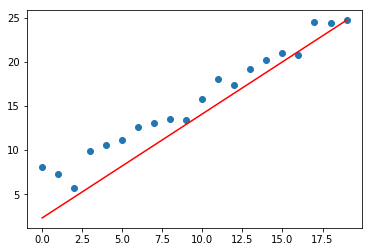

In [7]:
plt.plot( y_,'o',y_pred,'r')
plt.show()

### Pseudo Inverse Method

In [8]:
X_b = np.c_[np.ones((N,1)),X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y_)
print(theta_best)

[5.23457807 0.98488982]


In [9]:
y_pred_pseudo = hypothesis(theta_best, X)
print( y_pred_pseudo )

[ 6.21946789  7.20435771  8.18924753  9.17413734 10.15902716 11.14391698
 12.1288068  13.11369662 14.09858643 15.08347625 16.06836607 17.05325589
 18.0381457  19.02303552 20.00792534 20.99281516 21.97770498 22.96259479
 23.94748461 24.93237443]


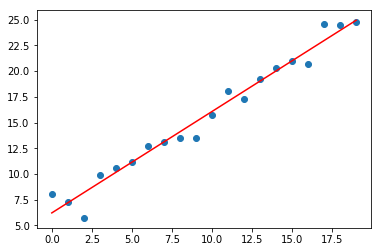

In [10]:
plt.plot( y_,'o',y_pred_pseudo,'r')
plt.show()